In [25]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('engagement.csv')

In [54]:
df1 = pd.read_csv('takehome1.csv')

In [28]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

In [210]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,Referral_create_time,Diff,adopted,invite_by_adopted,creation_day,weekday
0,1,2014-04-22,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,yahoo.com,"Thursday, August 9, 2012",620.889595,0,0,1,1
1,2,2013-11-15,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,gustr.com,"Thursday, August 30, 2012",442.032268,1,0,4,1
2,3,2013-03-19,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,gustr.com,"Saturday, June 9, 2012",283.003171,0,1,1,1
3,4,2013-05-21,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,yahoo.com,"Thursday, June 7, 2012",347.357558,0,1,1,1
4,5,2013-01-17,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,yahoo.com,"Monday, June 11, 2012",220.053727,0,1,3,1


In [35]:
df['time_stamp'] = df['time_stamp'].dt.floor('d').astype(np.int64)
#sorting and remove duplicated days per users 
df = df.sort_values(['user_id', 'time_stamp']).drop_duplicates()

a = df.groupby('user_id')['time_stamp'].rolling(window=3)
b = pd.to_timedelta((a.max()- a.min())).dt.days
#print (b)
 


In [34]:
c = b[b == 7].index.get_level_values('user_id').tolist()
#print (c)


In [31]:
s=[]

In [32]:
for i in c:
       if i not in s:
          s.append(i)


In [55]:
df1['adopted'] =  df1.object_id.isin(s).astype(int)

In [56]:
df1['invite_by_adopted'] =  df1.invited_by_user_id.isin(s).astype(int)

In [71]:
df1['creation_time'] = pd.to_datetime(df1['creation_time'])

In [58]:
df1['last_session_creation_time'] = pd.to_datetime(df1['last_session_creation_time'])

In [79]:
df1['creation_day'] = df1['creation_time'].dt.dayofweek

In [88]:
weekday = [0,1,2,3,4]
df1['weekday'] =  df1.creation_day.isin(weekday).astype(int)

In [61]:
#Two new features are created in the users table: 
#1:If they user they are invited by is an adopted user/not.
#2:difference between DOJ of invited_by_user and DOJ of the object(Asuumption: Users who have been using the platform for longtime tend to have more 
#impactful referral than the new user referrals.)
#3:weakday: If the user is created on weekday/weekend



In [52]:

def show_missing_count():
    missing = df1.columns[df1.isnull().any()].tolist()
    return missing
df1[show_missing_count()].isnull().sum()

#There are missing values in last-session_creationtime and invited_by_user_id.
#Since  invited_by_user_id can be empty if the user is not invited by our current customers I replace it with .

last_session_creation_time    3177
invited_by_user_id            5583
dtype: int64

In [170]:
df1.columns
#Drop the redundant/useless columns
df2=df1.drop(['creation_day','object_id','name', 'email','last_session_creation_time','invited_by_user_id','Referral_create_time','creation_time'],axis=1)
df2.columns

Index(['creation_source', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'email_domain', 'Diff',
       'adopted', 'invite_by_adopted', 'weekday'],
      dtype='object')

In [171]:
df2.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,email_domain,Diff,adopted,invite_by_adopted,weekday
0,GUEST_INVITE,1,0,11,yahoo.com,620.889595,0,0,1
1,ORG_INVITE,0,0,1,gustr.com,442.032268,1,0,1
2,ORG_INVITE,0,0,94,gustr.com,283.003171,0,1,1
3,GUEST_INVITE,0,0,1,yahoo.com,347.357558,0,1,1
4,GUEST_INVITE,0,0,193,yahoo.com,220.053727,0,1,1


In [102]:
#print(df2['email_domain'].value_counts())
#If email domainnot in gmail/yahoo/jourrapise/cuvox/gustr/hotmail encode as other category 

In [172]:
email_domain = ['yahoo.com','gustr.com','gmail.com','jourrapise.com','cuvox.com','hotmail.com']

In [173]:
for i in range(len(df2)) :
    if df2['email_domain'][i] not in email_domain:
        df2['email_domain'][i] = 'other'

C:\Users\pothulbh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [174]:
df2['email_domain'].value_counts()

other          3647
gmail.com      3562
yahoo.com      2447
gustr.com      1179
hotmail.com    1165
Name: email_domain, dtype: int64

In [185]:
#Before Modelling
#1.one hot encoding for source
#2.one hot encoding for email_domain
#3.convert data types of adopted ,invite_by_adopted,weekday 
#4.bin diff

df2.columns


Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'Diff', 'adopted', 'invite_by_adopted', 'weekday',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'email_domain_gmail.com',
       'email_domain_gustr.com', 'email_domain_hotmail.com',
       'email_domain_other', 'email_domain_yahoo.com'],
      dtype='object')

In [189]:

df2['adopted'] = df2['adopted'].astype('category')
df2['invite_by_adopted'] = df2['invite_by_adopted'].astype('category')
df2['weekday'] = df2['weekday'].astype('category')

df2['adopted'] = df2['adopted'].cat.codes
df2['invite_by_adopted'] = df2['invite_by_adopted'].cat.codes
df2['weekday'] = df2['weekday'].cat.codes

In [176]:
df2 = pd.get_dummies(df2, columns=['creation_source', 'email_domain'])

In [190]:
df2.dtypes

opted_in_to_mailing_list                int64
enabled_for_marketing_drip              int64
org_id                                  int64
Diff                                  float64
adopted                                  int8
invite_by_adopted                        int8
weekday                                  int8
creation_source_GUEST_INVITE            uint8
creation_source_ORG_INVITE              uint8
creation_source_PERSONAL_PROJECTS       uint8
creation_source_SIGNUP                  uint8
creation_source_SIGNUP_GOOGLE_AUTH      uint8
email_domain_gmail.com                  uint8
email_domain_gustr.com                  uint8
email_domain_hotmail.com                uint8
email_domain_other                      uint8
email_domain_yahoo.com                  uint8
dtype: object

In [193]:
fin_df = df2.drop('org_id',axis=1)


In [201]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sn

In [330]:
under_sample_data.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'Diff', 'adopted', 'invite_by_adopted', 'weekday',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'email_domain_gmail.com',
       'email_domain_gustr.com', 'email_domain_hotmail.com',
       'email_domain_other', 'email_domain_yahoo.com'],
      dtype='object')

In [331]:
train_y = under_sample_data['adopted'].values
train_X = under_sample_data.drop(["adopted","org_id","Diff"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

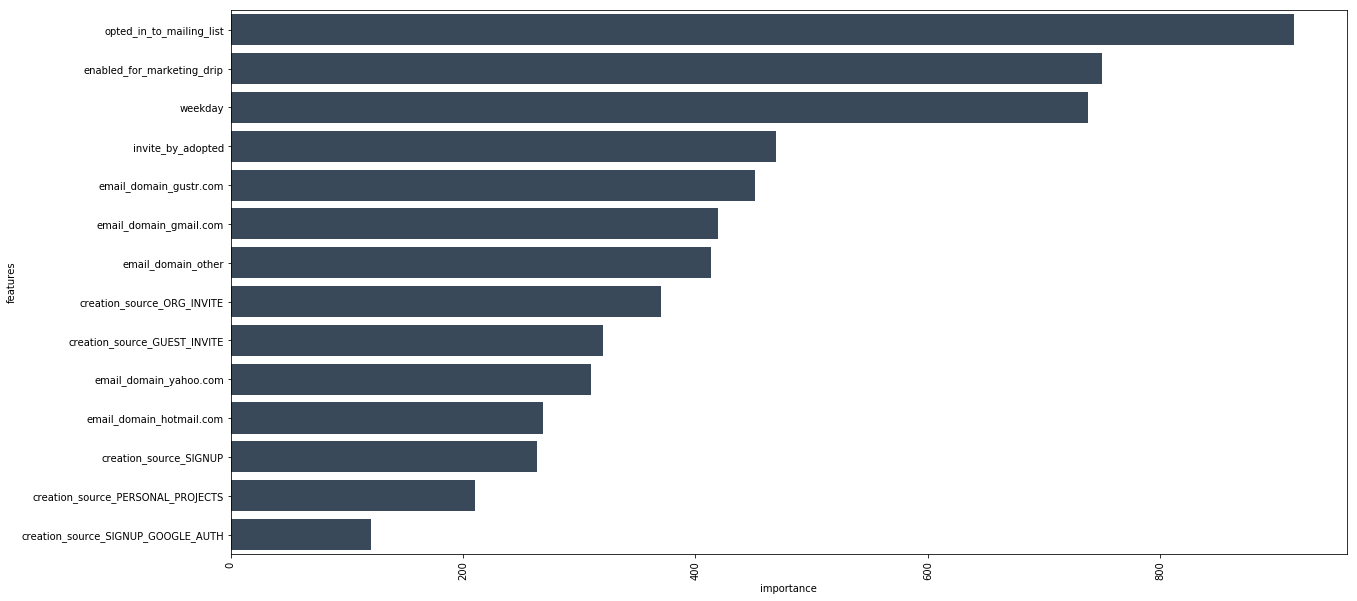

In [332]:
featureImportance = model.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)
sn.barplot(data=features.head(15),x="importance",y="features",ax=ax,orient="h",color="#34495e")
plt.show()

In [ ]:
#Modelling

Text(0,0.5,'Frequency')

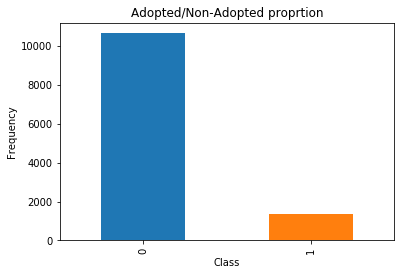

In [208]:
count_classes = pd.value_counts(df2['adopted'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Adopted/Non-Adopted proprtion")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [209]:
df2['adopted'].value_counts()

0    10642
1     1358
Name: adopted, dtype: int64

In [212]:
#Classes  are imbalance in more than 1:5 ratio

In [211]:
#Let's test performance after different sampling methods

In [217]:
# Number of data points in the minority class and indices
number_adop_users = len(df2[df2.adopted == 1])
adopt_indices = np.array(df2[df2.adopted == 1].index)

# Picking the indices of the majority classes
non_adapt_indices = df2[df2.adopted == 0].index


# Out of the indices we picked, randomly select "x" number (number_adop_users)
random_normal_indices = np.random.choice(non_adapt_indices, number_adop_users, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([adopt_indices,random_normal_indices])

# Under sample dataset
under_sample_data = df2.iloc[under_sample_indices,:]

In [248]:
under_sample_data['adopted'].value_counts()

1    1358
0    1358
Name: adopted, dtype: int64

In [341]:
def show_missing_count():
    missing = under_sample_data.columns[under_sample_data.isnull().any()].tolist()
    return missing
under_sample_data[show_missing_count()].isnull().sum()

Series([], dtype: float64)

In [317]:
#under_sample_data['Diff'] = under_sample_data['Diff'].fillna(0)
X.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invite_by_adopted', 'weekday', 'creation_source_GUEST_INVITE',
       'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',
       'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH',
       'email_domain_gmail.com', 'email_domain_gustr.com',
       'email_domain_hotmail.com', 'email_domain_other',
       'email_domain_yahoo.com'],
      dtype='object')

In [333]:
y = under_sample_data['adopted'].values
X = under_sample_data.drop(["adopted","Diff","org_id",], axis=1)

In [334]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [335]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()

In [336]:
logModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [337]:
predictions = logModel.predict(X_test)

In [338]:
print(classification_report(y_test, predictions))


             precision    recall  f1-score   support

          0       0.50      0.59      0.54       379
          1       0.57      0.48      0.52       436

avg / total       0.54      0.53      0.53       815



In [339]:

import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)

result=logit_model.fit()

result.summary2()

Optimization terminated successfully.
         Current function value: 0.680248
         Iterations 4


C:\Users\pothulbh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
C:\Users\pothulbh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\pothulbh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\pothulbh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                     Logit                 No. Iterations:        4.0000   
Dependent Variable:        y                     Pseudo R-squared:      0.018    
Date:                      2018-05-07 08:39      AIC:                   2612.3039
No. Observations:          1901                  BIC:                   2684.4557
Df Model:                  12                    Log-Likelihood:        -1293.2  
Df Residuals:              1888                  LL-Null:               -1316.8  
Converged:                 1.0000                Scale:                 1.0000   
---------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
---------------------------------------------------------------------------------
opted_in_to_mailing_list            0.1189   0.1218  0.9765 0.3288 -0.1198 0.3577
enabled_for_marketing_drip         -0.0750   0.1471 -0.5096 0.6103 -0.3634 0.2134
invite_by_adopted                   0.3756   0.1594  2.3573 0.0184  0.0633 0.6880
weekday                            -0.1290   0.1047 -1.2328 0.2177 -0.3342 0.0761
creation_source_GUEST_INVITE        0.2013      nan     nan    nan     nan    nan
creation_source_ORG_INVITE         -0.1178      nan     nan    nan     nan    nan
creation_source_PERSONAL_PROJECTS  -0.4846      nan     nan    nan     nan    nan
creation_source_SIGNUP              0.0350      nan     nan    nan     nan    nan
creation_source_SIGNUP_GOOGLE_AUTH  0.3496      nan     nan    nan     nan    nan
email_domain_gmail.com             -0.0467      nan     nan    nan     nan    nan
email_domain_gustr.com             -0.1122      nan     nan    nan     nan    nan
email_domain_hotmail.com            0.3129      nan     nan    nan     nan    nan
email_domain_other                  0.0708      nan     nan    nan     nan    nan
email_domain_yahoo.com             -0.2412      nan     nan    nan     nan    nan
=================================================================================

"""

In [342]:
#Print accuracy
accuracy = metrics.accuracy_score(predictions,y_test)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))


Accuracy : 53.129%


In [321]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=0)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
print(results)

Accuracy: 0.560 (0.039)
[0.57068063 0.46315789 0.54736842 0.56842105 0.55789474 0.61052632
 0.57368421 0.53684211 0.56315789 0.61052632]


In [322]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=0)
l1logreg = LogisticRegression(C=0.2000000000000001, penalty='l1')
scoring = 'accuracy'
results = model_selection.cross_val_score(l1logreg, X_train, y_train, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
print(results)

Accuracy: 0.563 (0.056)
[0.56020942 0.44210526 0.55263158 0.61578947 0.53684211 0.63684211
 0.55263158 0.52631579 0.56315789 0.64210526]


In [323]:
from sklearn.ensemble import RandomForestClassifier

In [324]:
#random forest
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=8, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")

print(metrics.accuracy_score(y_test, rf.predict(X_test)))




 ---Random Forest Model---
0.5325153374233129


In [ ]:
#Use Gradient Boosting